In [90]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [3]:
auto_xls = pd.read_excel('automotive.xlsx')
#auto_csv = pd.read_csv('automotive_csv.csv', encoding = 'latin-1')

In [4]:
auto_xls.head()

id  \
0  7315388495   
1  7315387590   
2  7315378954   
3  7315378371   
4  7315377820   

                                                                                         url  \
0   https://medford.craigslist.org/ctd/d/topawa-2014-nissan-versa-plus-sedan/7315388495.html   
1    https://medford.craigslist.org/cto/d/medford-award-winning-1965-mustang/7315387590.html   
2  https://medford.craigslist.org/cto/d/medford-2008-toyota-tacoma-only-110k/7315378954.html   
3   https://medford.craigslist.org/ctd/d/portland-2018-ford-350-4x4-4wd-f350/7315378371.html   
4  https://medford.craigslist.org/ctd/d/gladstone-2015-ford-250-4x4-4wd-f250/7315377820.html   

            region                      region_url  price  year manufacturer  \
0  medford-ashland  https://medford.craigslist.org   6888  2014       nissan   
1  medford-ashland  https://medford.craigslist.org  19500  1965         ford   
2  medford-ashland  https://medford.craigslist.org  16600  2008       toyota   
3  medford-ashland  https://medford.craigslist.org      0  2018         ford   
4  medford-ashland  https://medford.craigslist.org      0  2015         ford   

                        model  condition    cylinders    fuel odometer  \
0                 versa splus   like new  4 cylinders     gas    91088   
1                     mustang  excellent  8 cylinders     gas    73500   
2             tacoma xtra cab       good  4 cylinders     gas   110000   
3                       f-350        NaN  8 cylinders     gas    47400   
4  f-250 super duty lariat li        NaN  8 cylinders  diesel   107055   

  title_status transmission                VIN drive      size    type  \
0        clean    automatic  3N1CN7AP7EL850675   fwd   compact   sedan   
1        clean    automatic                NaN   rwd  mid-size   coupe   
2        clean       manual                NaN   4wd       NaN  pickup   
3        clean    automatic  1FT8W3B67JEB76679   4wd       NaN   truck   
4        clean    automatic  1FT7W2BT8FEC70315   4wd       NaN   truck   

  paint_color  \
0       black   
1         red   
2       black   
3         NaN   
4         NaN   

                                                             image_url  \
0  https://images.craigslist.org/00q0q_5st033GWtInz_0ew0jm_600x450.jpg   
1  https://images.craigslist.org/00s0s_12aake5jYXXz_0ak07K_600x450.jpg   
2  https://images.craigslist.org/00808_2iPAZZCx7NJz_0CI0t2_600x450.jpg   
3  https://images.craigslist.org/00303_bBKG78Zb11Wz_0cU09G_600x450.jpg   
4  https://images.craigslist.org/00f0f_6ruN4GZvmPtz_0cU09G_600x450.jpg   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

## Quick Overview abou the dataset

In [ ]:
#auto_xls.manufacturer.unique()

### Quality Analysis

#### year: non integer type and missing value 
#### price : missing values and non numeric values
#### cyllinder : non integer type, some text information
#### Manufacturer : categorical data





In [5]:
#auto_xls.info()

In [6]:
df2 = auto_xls[['price', 'year', 'manufacturer', 'cylinders', 'fuel','transmission']]
df2.head()

,price,year,manufacturer,cylinders,fuel,transmission
0,6888,2014,nissan,4 cylinders,gas,automatic
1,19500,1965,ford,8 cylinders,gas,automatic
2,16600,2008,toyota,4 cylinders,gas,manual
3,0,2018,ford,8 cylinders,gas,automatic
4,0,2015,ford,8 cylinders,diesel,automatic


In [94]:
df2 = df2[df2.year.astype(str).str.isnumeric()]

In [95]:
df2 = df2[df2['year'] != 45382346]

In [96]:
#df2.dropna(subset = ['year'], inplace = True)

In [97]:
df2['year'] = df2.year.astype(int)

In [98]:
df2['year'].unique()

array([2014, 1965, 2008, 2007, 2011, 2015, 2012, 1991, 2006, 2010, 2013,
       2002, 2005, 2016, 2017, 2003, 1996, 2001, 2004, 2019, 2000, 2018,
       2009, 1997, 1999, 1998, 2020, 1994, 1949, 1972, 1932, 1990, 1987,
       1983, 1995, 1980, 1969, 1981, 2021, 1988, 1986, 1975, 1993, 1985,
       1978, 1960, 1970, 1957, 1982, 1984, 1989, 1929, 1968, 1979, 1967,
       1959, 1958, 1947, 1964, 1976, 1941, 1966, 1977, 1956, 1971, 1955,
       1974, 1953, 1963, 1948, 1928, 1992, 1951, 1961, 1973, 1962, 1942,
       1930, 1954, 1952, 1923, 1931, 1939, 1935, 1936, 1924, 1938, 1933])

/Users/khazi/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Cars Manufactured Every Year')

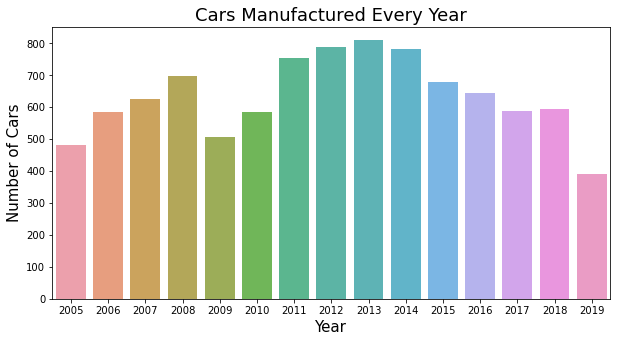

In [99]:
car_count  = df2['year'].value_counts()
car_count = car_count[:15,]
plt.figure(figsize=(10,5))
sns.barplot(car_count.index,car_count.values,alpha=0.9)
plt.xlabel("Year", size=15)
plt.ylabel("Number of Cars", size=15)
plt.title("Cars Manufactured Every Year", size=18)

In [92]:
df2 = df2[df2.price.astype(str).str.isnumeric()]

In [14]:
df2.isnull().sum()

price              0
year               0
manufacturer     965
cylinders       9292
fuel             212
transmission     304
dtype: int64

In [15]:
#df2.dropna(subset = ['price'], inplace = True)

In [17]:
df2['price'] = df2.price.astype(int)

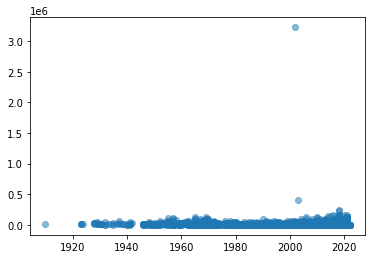

In [19]:
# price outliers 
plt.scatter(df2.year, df2.price, alpha=0.5)

In [20]:
# filter out the prices of the cars below 700 euro
df2 = df2[df2['price'] >= 700]

/Users/khazi/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Price range')

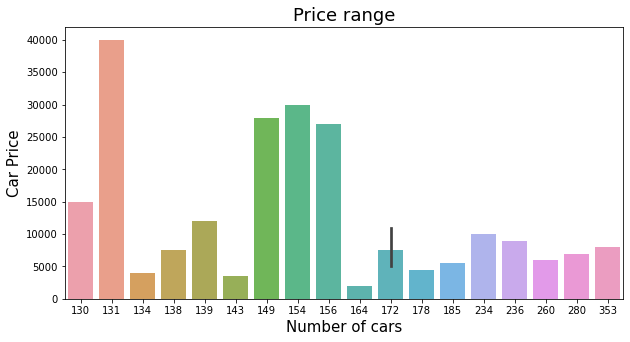

In [21]:
car_price  = df2['price'].value_counts(sort=True)
car_price = car_price[:20,]
plt.figure(figsize=(10,5))
sns.barplot(car_price.values, car_price.index,alpha=0.9)
plt.ylabel("Car Price", size=15)
plt.xlabel("Number of cars", size=15)
plt.title("Price range", size=18)

In [22]:
df2.describe()

,price,year
count,2.072900e+04,20729.000000
mean,1.733032e+04,2009.793188
std,2.683771e+04,9.782645
min,7.000000e+02,1910.000000
25%,6.500000e+03,2007.000000
50%,1.247500e+04,2012.000000
75%,2.499000e+04,2016.000000
max,3.226714e+06,2022.000000


In [23]:
## cylinders
def cyl(temp):
    x = str(temp).split(' ')
    return(str(x[0]))

df2.cylinders = df2.cylinders.apply(cyl)


df2 = df2[df2.cylinders!="nan"] 
df2 = df2[df2.cylinders!="other"]
df2 = df2[df2.cylinders!=""] 
df2.cylinders = df2.cylinders.astype('int')

In [24]:
df2.cylinders.unique()

array([ 4,  8,  6,  5, 12, 10,  3])

/Users/khazi/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Car-Cylinders ratio')

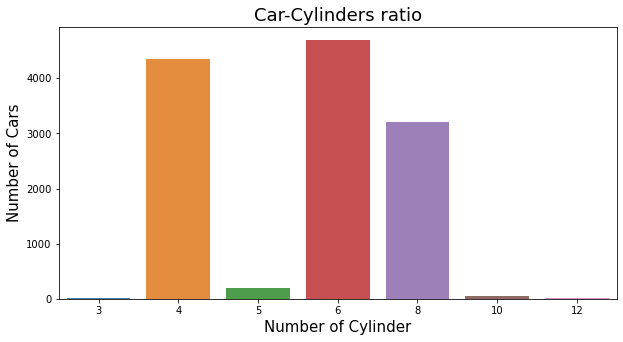

In [25]:
car_cylind  = df2['cylinders'].value_counts(sort=True)
car_cylind = car_cylind[:10,]
plt.figure(figsize=(10,5))
sns.barplot(car_cylind.index,car_cylind.values, alpha=0.9)
plt.ylabel("Number of Cars", size=15)
plt.xlabel("Number of Cylinder", size=15)
plt.title("Car-Cylinders ratio", size=18)

In [26]:
# fuel type


In [27]:
df2.fuel.unique()

array(['gas', 'diesel', 'hybrid', 'electric', 'other', nan], dtype=object)

In [28]:
df2[df2.fuel.isna()]

,price,year,manufacturer,cylinders,fuel,transmission
10057,7995,2010,ford,6,NaN,manual
20382,24900,2001,chevrolet,8,NaN,manual
20723,13900,2014,bmw,4,NaN,automatic
20724,10000,2013,volkswagen,5,NaN,automatic
20725,14500,2012,toyota,4,NaN,automatic
20791,12900,2013,ford,6,NaN,automatic
20793,4900,2006,honda,4,NaN,automatic
20794,7800,2007,honda,4,NaN,automatic
20796,13900,2014,bmw,4,NaN,automatic
20797,17700,2012,chevrolet,6,NaN,manual


In [29]:
df2 = df2[~df2.fuel.isna()]

In [30]:
df2.fuel.unique()

array(['gas', 'diesel', 'hybrid', 'electric', 'other'], dtype=object)

In [31]:
df2.fuel = df2.fuel[df2.fuel.astype('str').str.isalpha()]
df2.fuel = df2['fuel'].astype('str').str.slice(0,3)

/Users/khazi/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Cars-Fuel type')

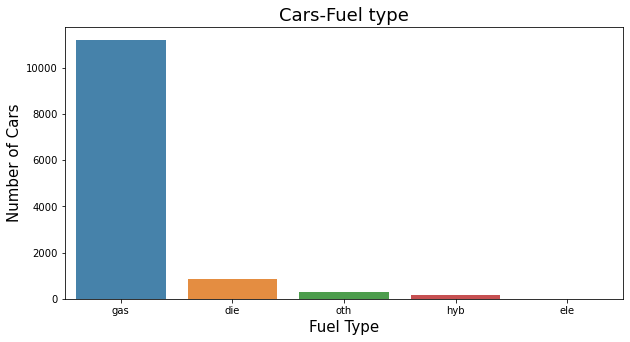

In [32]:
car_fuel  = df2['fuel'].value_counts(sort=True)
car_fuel = car_fuel
plt.figure(figsize=(10,5))
sns.barplot(car_fuel.index,car_fuel.values, alpha=0.9)
plt.xlabel("Fuel Type", size=15)
plt.ylabel("Number of Cars", size=15)
plt.title("Cars-Fuel type", size=18)


In [33]:
df2.fuel.value_counts()

gas    11212
die      867
oth      283
hyb      160
ele        5
Name: fuel, dtype: int64

In [34]:
#df2.manufacturer.value_counts()

In [35]:
# manufacturer

In [36]:
df2 = df2[~df2.manufacturer.isna()]

In [37]:
df2.manufacturer = df2['manufacturer'].str.slice(0,3)

/Users/khazi/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Total Cars per Manufacturer')

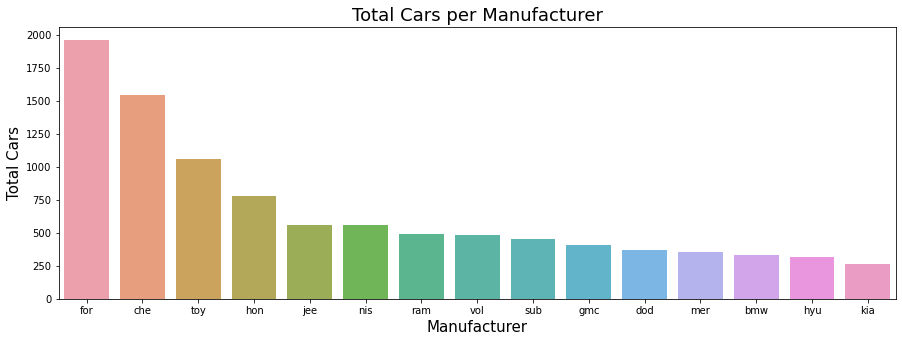

In [38]:
car_manu  = df2['manufacturer'].value_counts(sort=True)
car_manu = car_manu[:15,]
plt.figure(figsize=(15,5))

sns.barplot(car_manu.index,car_manu.values, linewidth=5, alpha=0.9)
plt.xlabel("Manufacturer", size=15)
plt.ylabel("Total Cars", size=15)
plt.title("Total Cars per Manufacturer", size=18)

In [39]:
df2.manufacturer.value_counts()

for    1961
che    1543
toy    1059
hon     781
jee     558
nis     557
ram     488
vol     486
sub     455
gmc     409
dod     366
mer     351
bmw     333
hyu     314
kia     261
lex     233
aud     214
chr     200
bui     174
maz     173
cad     164
acu     161
inf     140
pon     122
lin     101
min      83
mit      73
rov      60
por      52
sat      51
jag      43
fia      21
dat       6
fer       2
alf       2
lan       1
Name: manufacturer, dtype: int64

Text(0.5, 1.0, 'Car prices comparision between manufacturers')

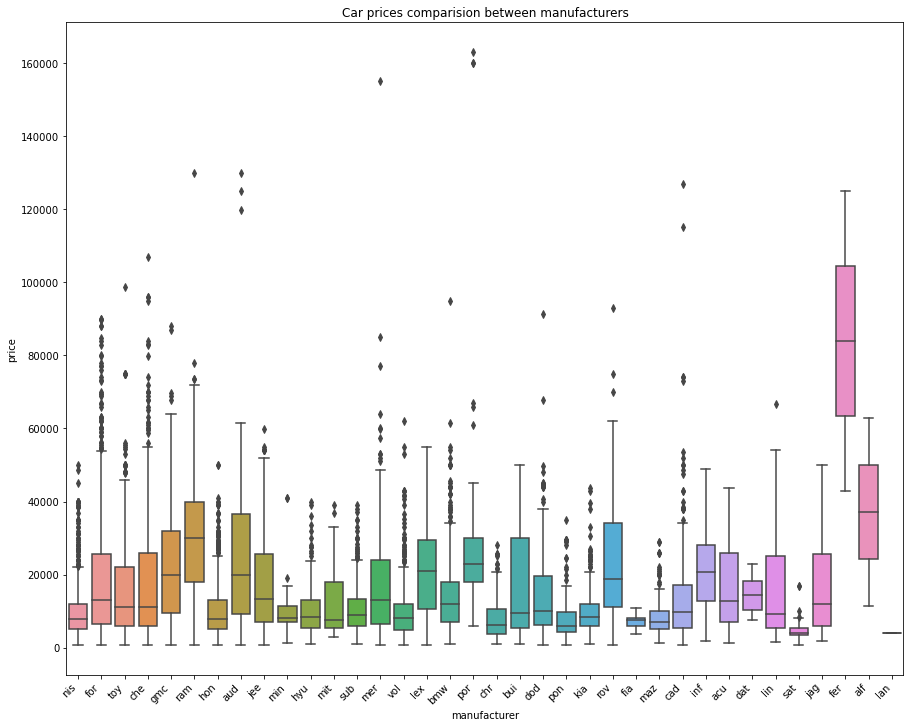

In [42]:
plt.figure(figsize=(15,12))
ax = sns.boxplot(x = 'manufacturer', y = 'price', data = df2)
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')
ax.set_title('Car prices comparision between manufacturers')

In [44]:
# High end car manufacturers, Porsche and Mercedes
df2[df2.price > 130000]

,price,year,manufacturer,cylinders,fuel,transmission
4923,162995,2018,por,6,gas,automatic
5007,155000,2020,mer,6,die,automatic
10477,159991,2018,por,6,gas,automatic
19340,159991,2018,por,6,gas,automatic


In [45]:
df2.transmission[df2.year == 2020].value_counts()

other        152
automatic    137
manual         6
Name: transmission, dtype: int64

In [46]:
#x = df2.transmission[df2.year == 2020]
#y = df2.year[df2.year == 2020]  # 
#plt.figure(figsize=(10,5))
#sns.barplot(y,x, alpha=0.9)

In [47]:
df2.transmission.unique()

array(['automatic', 'manual', 'other', nan], dtype=object)

In [48]:
df2 = df2[~df2.transmission.isna()]

In [49]:
df2.transmission = df2.transmission.str.slice(0,3)
df2.transmission.unique()

array(['aut', 'man', 'oth'], dtype=object)

/Users/khazi/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Car type : Automatic/ Manual/ Others ')

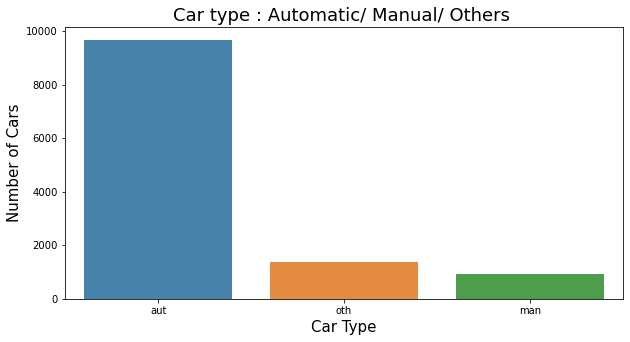

In [50]:
car_trans  = df2['transmission'].value_counts(sort=True)
car_trans = car_trans
plt.figure(figsize=(10,5))
sns.barplot(car_trans.index,car_trans.values, alpha=0.9)
plt.xlabel("Car Type", size=15)
plt.ylabel("Number of Cars", size=15)
plt.title("Car type : Automatic/ Manual/ Others ", size=18)

In [51]:
## Type
#df2 = df2[~df2.type.isna()]
#df2 = df2.type.str.slice(0,3)

In [52]:
df2.head()

,price,year,manufacturer,cylinders,fuel,transmission
0,6888,2014,nis,4,gas,aut
1,19500,1965,for,8,gas,aut
2,16600,2008,toy,4,gas,man
9,13500,2007,che,8,gas,aut
10,40995,2011,gmc,8,die,aut


In [53]:
df2.isnull().sum()

price           0
year            0
manufacturer    0
cylinders       0
fuel            0
transmission    0
dtype: int64

## PLOTS

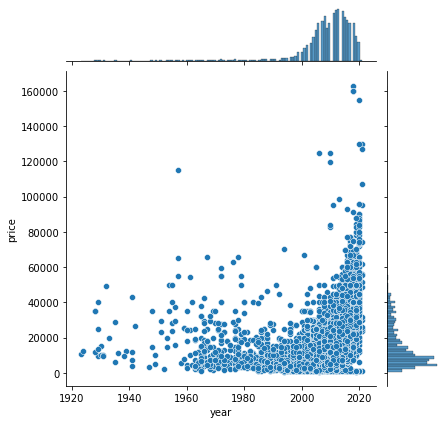

In [54]:
# joint plots
sns.jointplot(x= df2['year'], y= df2['price'], data=df2)

In [55]:
df2.isnull().sum()

price           0
year            0
manufacturer    0
cylinders       0
fuel            0
transmission    0
dtype: int64

<AxesSubplot:>

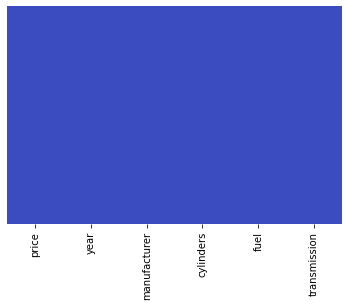

In [58]:
# no more null values
sns.heatmap(df2.isnull(), yticklabels = False, cbar=False, cmap = 'coolwarm')

In [59]:
df2.transmission.unique()

array(['aut', 'man', 'oth'], dtype=object)

In [60]:
df2.replace({'manufacturer' 
             : {'nis' : 0, 'for' : 1, 'toy' : 2, 'che' : 3, 'gmc' : 4, 'ram' : 5, 'hon' : 6, 'aud' : 7, 'jee' : 8, 
                'min' : 9, 'hyu' : 10, 'mit' : 11, 'sub' : 12, 'mer' : 13, 'vol' : 14,'lex' : 15, 'bmw' : 16, 
                'por' : 17, 'chr' : 18, 'bui' : 19, 'dod' : 20, 'kia' : 21, 'rov' : 22, 'fia' : 23, 'maz' : 24, 
                'cad' : 25, 'inf' : 26, 'acu' : 27, 'dat' : 28, 'lin' : 29, 'sat' : 30, 'jag' : 31, 'fer' : 32, 
                'alf' : 33, 'lan' : 34, 'pon':35 }}, inplace= True)

In [61]:
df2.replace({'fuel' : {'gas' : 0, 'die' : 1, 'hyb' : 2, 'ele' : 3, 'oth' : 4}}, inplace= True)

In [62]:
df2.replace({'transmission' : {'aut' : 0, 'man' : 1, 'oth' : 2}}, inplace= True)

In [63]:
df2.head()

,price,year,manufacturer,cylinders,fuel,transmission
0,6888,2014,0,4,0,0
1,19500,1965,1,8,0,0
2,16600,2008,2,4,0,1
9,13500,2007,3,8,0,0
10,40995,2011,4,8,1,0


# Model 1

In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.linear_model import Lasso

In [66]:
X = df2.drop(columns = 'price')
y = df2['price']

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.1, random_state=2)

In [68]:
# Linear regression

In [69]:
lr = LinearRegression()

In [70]:
lr.fit(X_train, y_train)

LinearRegression()

In [71]:
#Model Evaluation

In [72]:
train_data_predict = lr.predict(X_train)

In [73]:
error_score = metrics.r2_score(y_train, train_data_predict)
print(error_score)

0.36236003914117776


In [74]:
# Visualize the actual pric and predicted prices

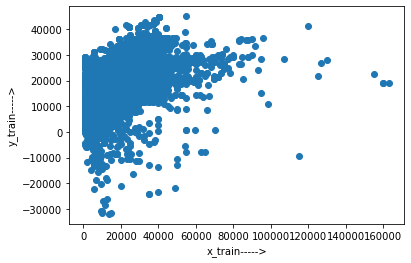

In [75]:
plt.scatter(y_train, train_data_predict)
plt.xlabel('x_train----->')
plt.ylabel('y_train----->') 
plt.show()

In [76]:
# predict for test_data
test_data_predict = lr.predict(X_test)

In [77]:
error_score = metrics.r2_score(y_test, test_data_predict)
print(error_score)

0.3458061379736088


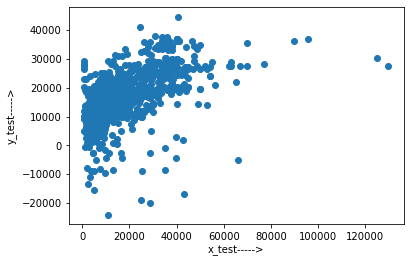

In [78]:
plt.scatter(y_test, test_data_predict) 
plt.xlabel('x_test----->')
plt.ylabel('y_test----->') 
plt.show()

## Model 2

In [79]:
lass_reg_mdl = Lasso()

In [80]:
lass_reg_mdl.fit(X_train, y_train)

Lasso()

In [81]:
# Evaluate

In [82]:
training_data_pred = lass_reg_mdl.predict(X_train)

In [83]:
error_met = metrics.r2_score(y_train, training_data_pred)

In [84]:
print(error_met)

0.3623600175503141


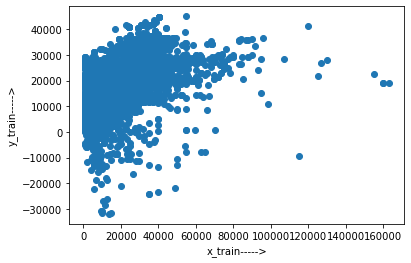

In [85]:
plt.scatter(y_train, training_data_pred) 
plt.xlabel('x_train----->')
plt.ylabel('y_train----->') 
plt.show()

In [86]:
test_data_pred = lass_reg_mdl.predict(X_test)

In [87]:
error_met = metrics.r2_score(y_test, test_data_pred)

In [88]:
print(error_met)

0.3457874605392801


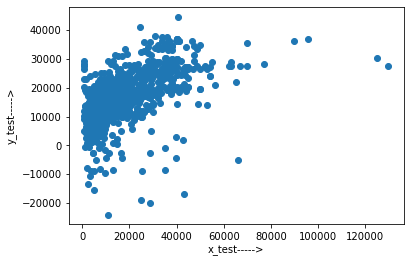

In [89]:
plt.scatter(y_test, test_data_pred) 
plt.xlabel('x_test----->')
plt.ylabel('y_test----->') 
plt.show()

## Practice work

In [ ]:
X = df2.drop(columns = 'price')
y = df2['price']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [ ]:
ohe = OneHotEncoder()
ohe.fit(X[['manufacturer','fuel','transmission']])

In [ ]:
ohe.categories_

In [ ]:
column_trans = make_column_transformer((OneHotEncoder(categories = ohe.categories_), ['manufacturer','fuel','transmission']), remainder='passthrough')

In [ ]:
lr = LinearRegression()

In [ ]:
pipe = make_pipeline(column_trans, lr)

In [ ]:
pipe.fit(X_train, y_train)

In [ ]:
y_pred = pipe.predict(X_test)

In [ ]:
y_pred

In [ ]:
r2_score(y_test, y_pred) 

In [ ]:
score = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = i)
    lr = LinearRegression()
    pipe = make_pipeline(column_trans, lr)
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    print(r2_score(y_test, y_pred))
    score.append(r2_score(y_test, y_pred))

In [ ]:
np.argmax(score)

In [ ]:
score[np.argmax(score)]

In [ ]:
df = auto_xls[['price', 'year', 'manufacturer', 'cylinders', 'fuel', 'odometer','transmission','drive', 'type']]

In [ ]:
def cyl(temp):
    x = str(temp).split(' ')
    return(str(x[0]))

In [ ]:
df.cylinders = df.cylinders.apply(cyl)

In [ ]:
def prices(tmp):
    if ((len(str(tmp)) > 5) or (len(str(tmp)) < 4)):
        return(np.NAN)
    else:
        return(tmp)

In [ ]:
df.price = df.price.apply(prices)

In [ ]:
def year_extract(year):
    if len(str(year)) > 4:
        return(np.NaN)
    else:
        return(str(year))

In [ ]:
df['year'] = df.year.apply(year_extract)

In [ ]:
#df.dropna(subset = ['price', 'year'], how= 'all')

In [ ]:
df = df[df['price'].notna()]

In [ ]:
#df.year.unique()

In [ ]:
#df

In [ ]:
#df.manufacturer.unique()

In [ ]:
manufacturer_list = ['nissan', 'ford', 'toyota', 'chevrolet', 'gmc', 'subaru', 'dodge', 'cadillac', 'buick', 'bmw','ram', 
                     'honda', 'audi', 'jeep', 'mini', 'hyundai', 'mitsubishi', 'mercedes-benz', 'volkswagen', 'volvo', 
                     'chrysler', 'lexus', 'acura', 'porsche', 'pontiac', 'kia', 'rover', 'fiat', 'mazda', 'infiniti', 
                     'datsun', 'lincoln', 'saturn', 'jaguar', 'mercury', 'tesla', 'ferrari', 'alfa-romeo', 'harley-davidson', 
                     'aston-martin', 'land rover', 'morgan']

In [ ]:
def manufacturer_extract(temp):
    if temp in manufacturer_list:
        return(temp)
    else:
        return(np.NAN)

def fuel_extract(temp):
    if temp in fuel_type:
        return(temp)
    else:
        return(np.NAN)

In [ ]:
df.manufacturer = df.manufacturer.apply(manufacturer_extract)

In [ ]:
df.fuel.unique()

In [ ]:
fuel_type = ['gas', 'diesel', 'hybrid', 'electric']

In [ ]:
df.fuel = df.fuel.apply(fuel_extract)